## As per the problem statement, we need to find the independent features responsible for high sales on the Company dataset.

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

In [3]:
df=pd.read_csv("Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

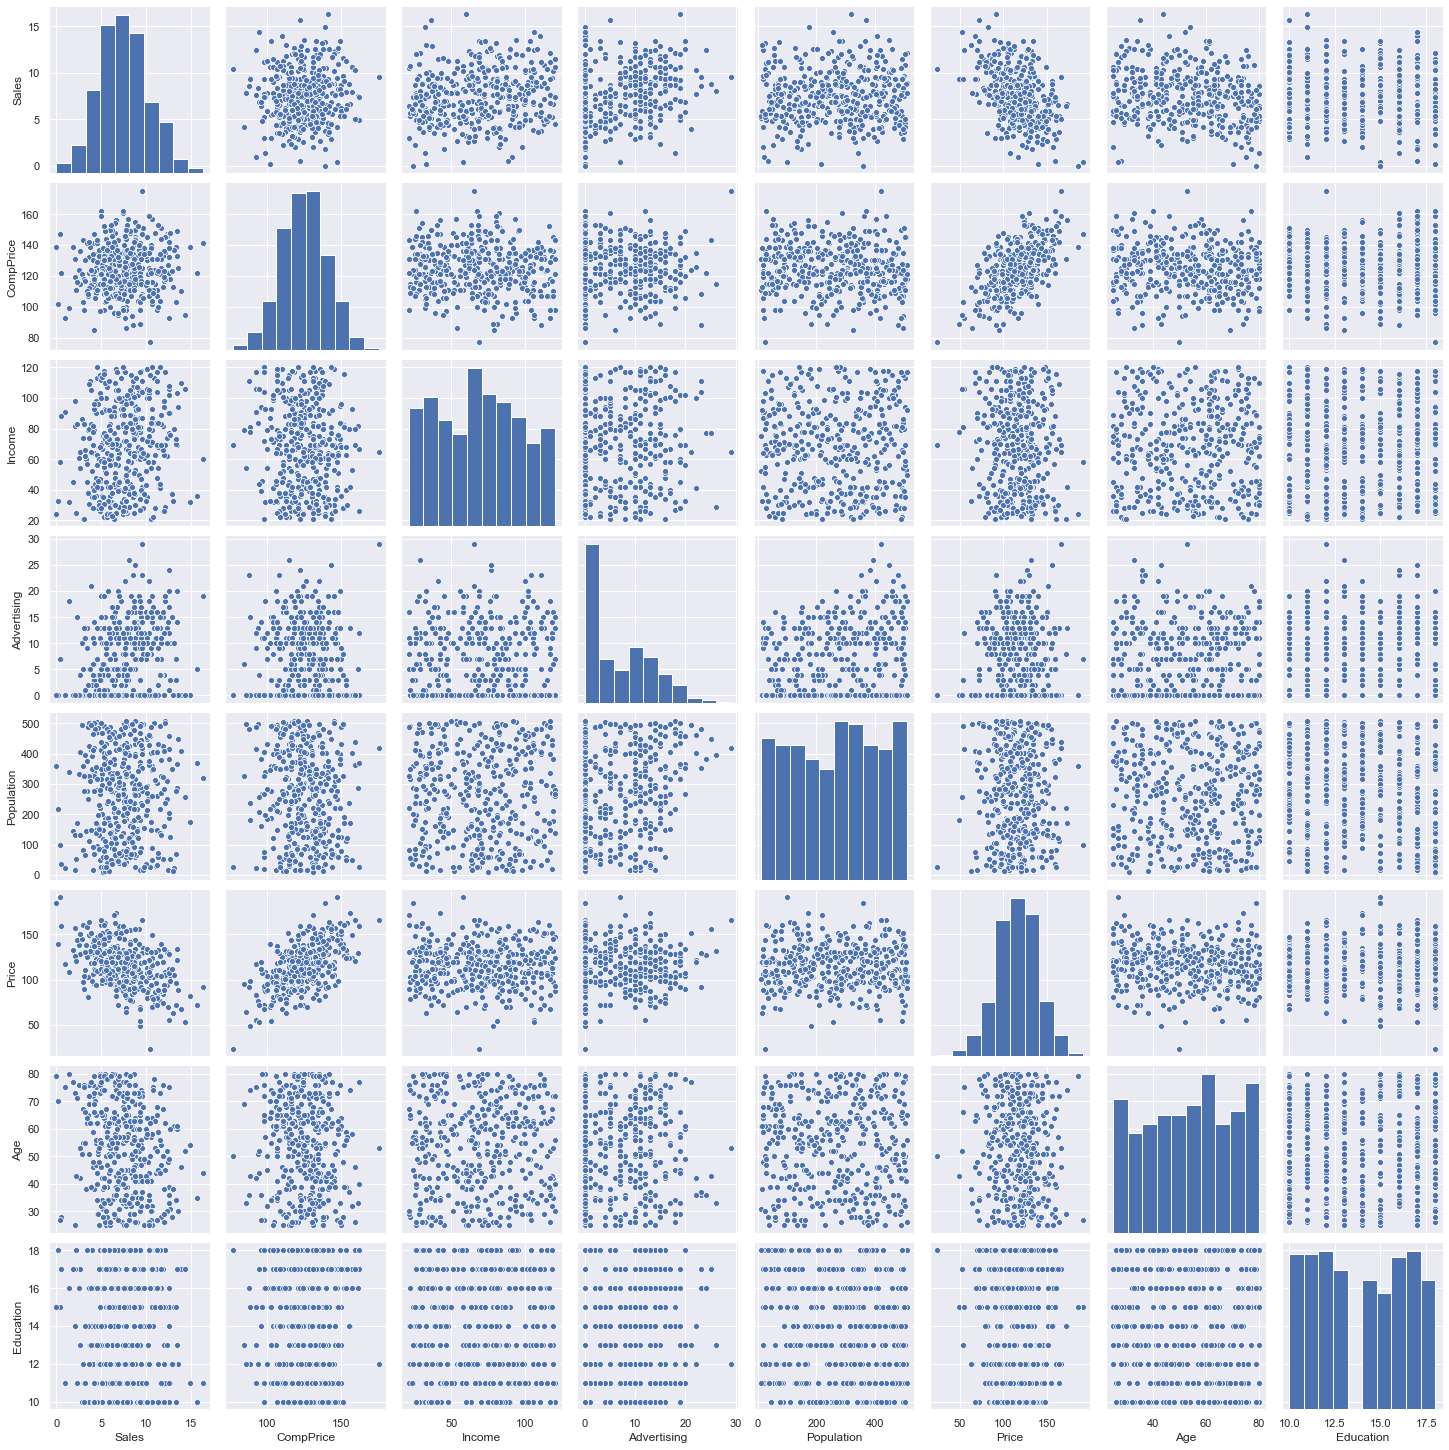

In [7]:
sns.pairplot(df) 

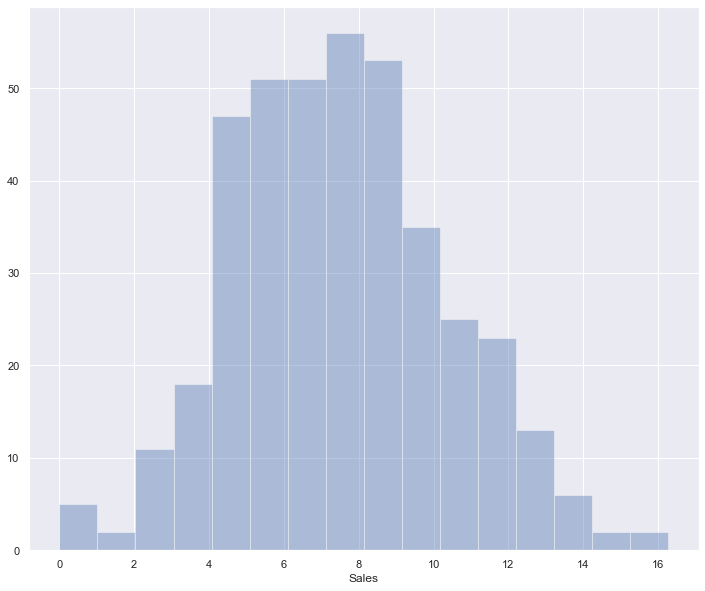

In [8]:
sns.distplot(df['Sales'], kde=False)

In [10]:
## Sales feature folllows a normal Distribution

In [9]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


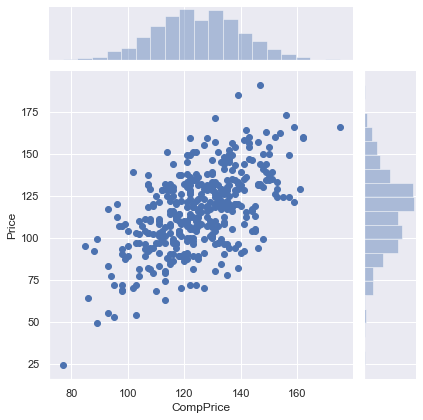

In [13]:
sns.jointplot(x='CompPrice',y='Price',data=df)

In [14]:
## We can see that Price and CompPrice are positively correlated

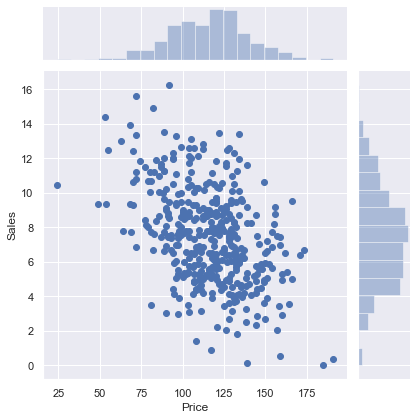

In [16]:
sns.jointplot(x='Price',y='Sales',data=df)

In [17]:
## We can say that Sales drop as the Prices increase which is quite natural, following a negative correlation

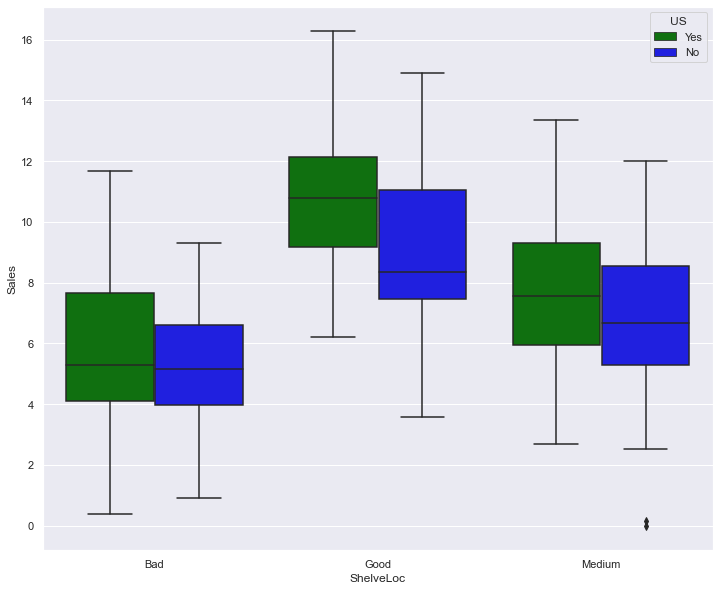

In [20]:
# Investigate the distribution of Sales by Categorical Variables

pal = ['green', 'blue','red']

g = sns.boxplot(x = 'ShelveLoc', y = 'Sales', data = df, hue = 'US', palette = pal)
               

In [21]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
features=['ShelveLoc', 'Urban', 'US']
new_df = pd.get_dummies(df, columns = features,drop_first=True)

In [11]:
new_df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [21]:
# Split the data into X & y

X = new_df.drop('Sales', axis = 1)
y = new_df['Sales']

print(X.shape)
print(y.shape)

(400, 11)
(400,)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
from sklearn.feature_selection import mutual_info_regression
# We shall use Information gain - Mutual information to determine the important features
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.000000, 0.000000, 0.084834, 0.006074, 0.043461, 0.089088,
       0.000000, 0.112984, 0.071303, 0.000000, 0.002085])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ShelveLoc_Good      0.112984
Age                 0.089088
Advertising         0.084834
ShelveLoc_Medium    0.071303
Price               0.043461
Population          0.006074
US_Yes              0.002085
Urban_Yes           0.000000
Education           0.000000
Income              0.000000
CompPrice           0.000000
dtype: float64

## We Come to the conclusion that ShelveLOc, Age, Advertising, Price, Popolation and US features are important to determine Sales.